1\. **Spotting correlations**

Load the remote file:

```bash
https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv
```

with Pandas and create scatter plots with all possible combinations of the following features:
    
  + features_1
  + features_2
  + features_3
  
Are these features correlated?

In [2]:
import pandas as pd

correlation1:  -0.005219711383220027
correlation2:  0.02369042507320443
correlation3:  0.04735993943504082
There is no correlation


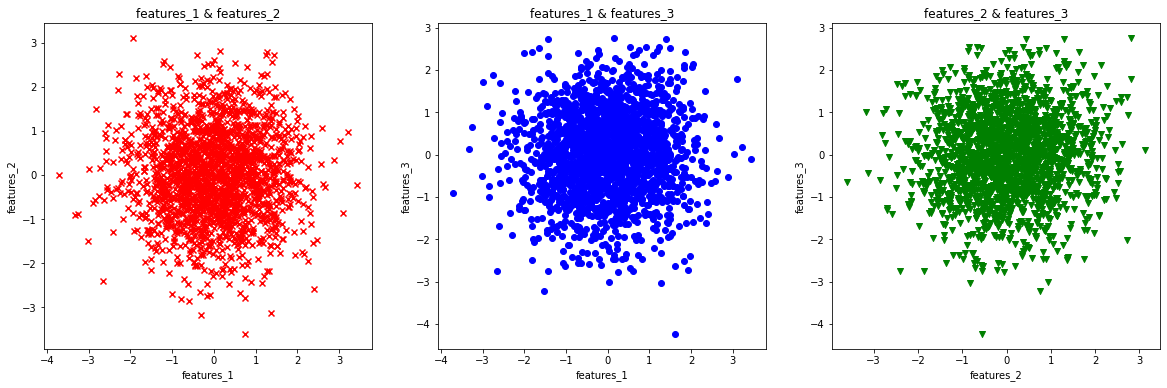

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

file_name = 'regression_generated.csv'
df = pd.read_csv(file_name)
data_pairs = []
column_names = ['features_1','features_2','features_3']

fig, (ax1, ax2,ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20,6))
ax1.scatter(x=df[column_names[0]], y=df[column_names[1]], marker='x', c='r')
ax1.set_title('features_1 & features_2')
ax1.set_xlabel('features_1')
ax1.set_ylabel('features_2')

ax2.scatter(x=df[column_names[0]], y=df[column_names[2]], marker='o', c='b')
ax2.set_title('features_1 & features_3')
ax2.set_xlabel('features_1')
ax2.set_ylabel('features_3')

ax3.scatter(x=df[column_names[1]], y=df[column_names[2]], marker='v', c='g')
ax3.set_title('features_2 & features_3')
ax3.set_xlabel('features_2')
ax3.set_ylabel('features_3')

corr1 = np.corrcoef(df[column_names[0]], df[column_names[1]])[0,1]
corr2 = np.corrcoef(df[column_names[0]], df[column_names[2]])[0,1]
corr3 = np.corrcoef(df[column_names[1]], df[column_names[2]])[0,1]

print("correlation1: ", corr1)
print("correlation2: ", corr2)
print("correlation3: ", corr3)
print("There is no correlation")

2\. **Color-coded scatter plot**

Produce a scatter plot from a dataset with two categories.

* Write a function that generates a 2D dataset consisting of 2 categories. Each category should distribute as a 2D gaussian with a given mean and standard deviation. Set different values of the mean and standard deviation between the two samples.
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below:

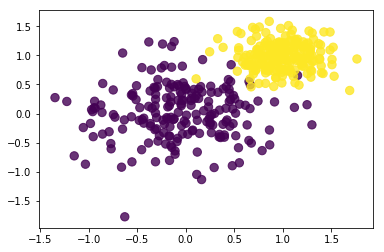

In [4]:
from IPython.display import Image
Image('images/two_categories_scatter_plot.png')

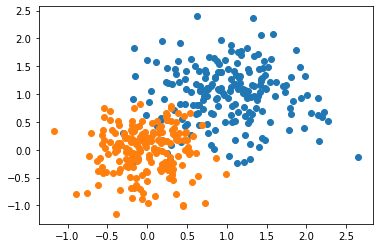

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def gaussian(mean,sta_dev) : 
    return np.random.normal(mean,sta_dev,200)

x1 = gaussian(1,0.5)
y1 = gaussian(1,0.5)
plt.scatter(x1,y1)

x2 = gaussian(0,0.4)
y2 = gaussian(0,0.4)
plt.scatter(x2,y2)

plt.show()

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following pickle file:
```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```
* Inspect the dataset, you'll find two variables (features)
* Convert the content to a Pandas Dataframe
* Clean the sample by selecting the entries (rows) with the absolute values of the variable "residual" smaller than 2
* Plot a Seaborn `jointplot` of "residuals" versus "distances", and use seaborn to display a linear regression. 

Comment on the correlation between these variables.

* Create manually (without using seaborn) the profile histogram for the "distance" variable; choose an appropriate binning.
* Obtain 3 numpy arrays:
  * `x`, the array of bin centers of the profile histogram of the "distance" variable
  * `y`, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * `err_y`, the standard deviation of the of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

X array:
[ 0.83333333  2.5         4.16666667  5.83333333  7.5         9.16666667
 10.83333333 12.5        14.16666667 15.83333333 17.5        19.16666667
 20.83333333 22.5        24.16666667]

Y array:
[-0.19121409 -0.16524649 -0.136472   -0.12858998 -0.08225938 -0.0986224
 -0.06823558 -0.09576672 -0.13752665 -0.12755093 -0.16117397 -0.08168838
  0.0445752   0.09428571  0.36047619]

Y errors array:
[0.4650168  0.40956283 0.40609345 0.42818694 0.43703932 0.41852454
 0.45196948 0.49425753 0.45733719 0.45586764 0.41596622 0.3922764
 0.46746555 0.09293403 1.18338526]



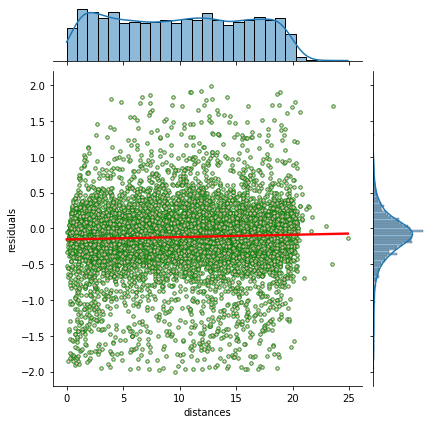

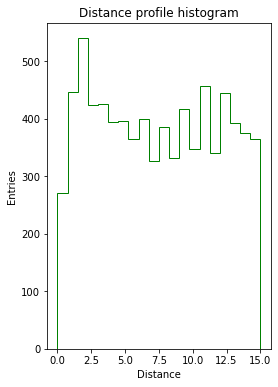

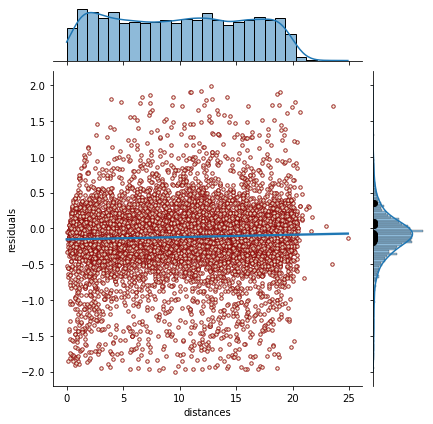

In [10]:
import pickle

filename = "residuals_261.pkl"
infile = open(filename, "rb")
tdict = pickle.load(infile).item()
infile.close()

df = pd.DataFrame(tdict)
df = df[abs(df.loc[:, "residuals"]) < 2]

# Seaborn jointplot
sns.jointplot(x="distances", y="residuals", data=df, kind="reg", joint_kws={"scatter_kws":{"color":"pink", "edgecolors":"green", "s":12}, "line_kws":{"color":"r"}})

#Plotting manually the distance histogram
fig = plt.figure(figsize=(4, 6)) # create the figure and the axes
plt.hist(df["distances"], range=(0, 15), bins=20, histtype="step", color="green")
ax = fig.axes[0]
ax.set_title("Distance profile histogram")
ax.set_xlabel("Distance")
ax.set_ylabel("Entries")

#The x, y err_y arrays
aux = np.linspace(0, 25, 16)
x = np.array((aux[0:15]+aux[1:16])/2)

# y as mean, err_y as std deviation of the values contained in a bin
dux = np.digitize(df["distances"], aux)
y = np.zeros(15)
err_y = np.zeros(15)
for i in range(15):
    y[i] += [df["residuals"][dux == i+1].mean(),]
    err_y[i] += [df["residuals"][dux == i+1].std(),]

print("X array:")
print(str(x) + "\n")
print("Y array:")
print(str(y) + "\n")
print("Y errors array:")
print(str(err_y) + "\n")

# Overlap jointplot-y with errorbars
sns.jointplot(x="distances", y="residuals", data=df, kind="reg", joint_kws={"scatter_kws":{"color":"beige", "edgecolors":"darkred", "s":12}})
plt.errorbar(x=x, y=y, ecolor="r", fmt="ko")

plt.show()

4\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn):

* Fill a numpy array `x` of length N (with $N=\mathcal{O}(100)$) with a variable normally distributed, with a given mean and standard deviation
* Fill an histogram in pyplot taking proper care of the aesthetic:
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* For every element of `x`, create a gaussian with the mean corresponding to the element value and the standard deviation as a parameter that can be tuned. The standard deviation default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with `np.sum()`) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method. Superimpose the normalized sum of all gaussians to the first histogram.


C:\Users\buket\AppData\Local\Temp\ipykernel_20832\3080858933.py:19: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "x" (-> marker='x'). The keyword argument will take precedence.
  ax1.errorbar(x=bincenters, y=freq, yerr=np.sqrt(freq), fmt='x', c='b', marker='*', markersize=4, capsize=5)


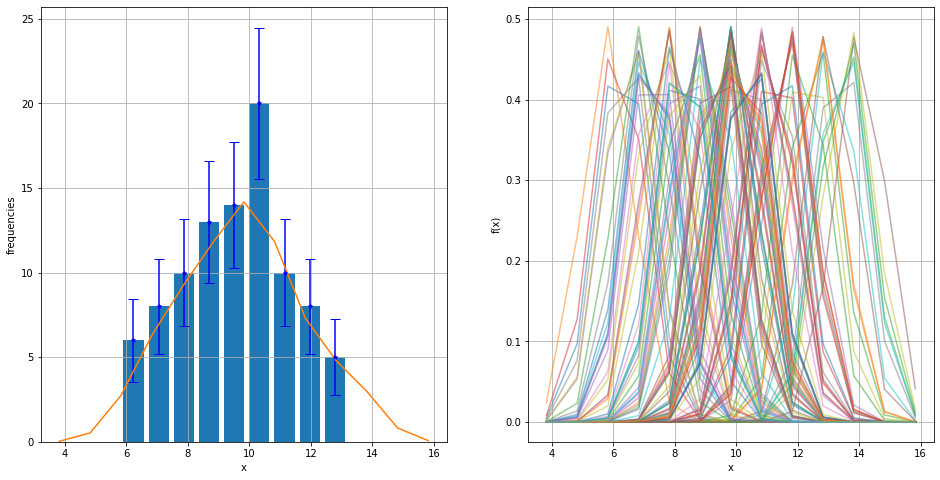

In [3]:
import numpy as np
from scipy import integrate
from scipy.stats import norm
import matplotlib.pyplot as plt
#normally distributed numpy array, x, of len(N) (with N=O(100))
mu, sigma = 10, 2
N=100
x = np.random.normal(mu, sigma, N)
#Fill an histogram
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))
Nbins=10
bins=np.arange(x.min(), x.max(), (x.max()-x.min())/Nbins)
freq, bins, patches = ax1.hist(x=x, bins=bins,alpha=1, histtype='bar', rwidth=0.8)
ax1.grid()
ax1.set_xlabel('x')
ax1.set_ylabel('frequencies')
#error part of the question
bincenters = (bins[1:] + bins[:-1])/2
ax1.errorbar(x=bincenters, y=freq, yerr=np.sqrt(freq), fmt='x', c='b', marker='*', markersize=4, capsize=5)
#create a gaussian with the mean corresponding to the element 
std_def = 1.06 * x.std() * (x.size ** -0.2)
xrange = np.arange(x.min()-sigma, x.max()+sigma)
gaussians = []
for i, dat in enumerate(x):
    gaussians.append( norm(loc=dat, scale=std_def).pdf(xrange) )
    ax2.plot(xrange, gaussians[i], alpha=0.5)
ax2.set_xlabel('x')
ax2.set_ylabel('f(x)')
ax2.grid()
#Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral 
#of the original histogram.
area=integrate.trapz(freq, dx=bins[1]-bins[0])
kde=np.array(gaussians).sum(axis=0)
ax1.plot(xrange,kde/sum(kde)*area)
plt.show()